In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import BlackScholes as bs
import time
import variance_curve as vc

from scipy.optimize import least_squares as ls
from rbergomi import rBergomi

In [5]:
def price_call(S, K, N, r, q, T):
    N = len(K)
    p = np.zeros(N)
    for i in range(N):
        p[i] = np.mean(np.maximum(S[:,-1]-K[i],0)*np.exp(-(r-q)*T))
    return p

In [8]:
S0 = 4017.8
t0 = "23 Jan 2023"

IV_df = pd.read_csv("hist_spx.csv")
moneyness = np.array([80.0,90.0,95.0,97.5,100.0,102.5,105.0,110.0,120.0])
maturities = np.array(IV_df['Exp Date']).flatten()
IV = np.array(IV_df.drop(columns = 'Exp Date'))/100.

r = 0.0291; q = 0.0154;

K = moneyness*S0/100

In [9]:
nr = len(maturities); nc = len(K);
P_iv = np.zeros([nr,nc])
for i in range(nr):
    P_iv[i,:] = bs.BSCall(S0, K, maturities[i], r, q, IV[i,:])

In [12]:
nr = len(maturities); nc = len(K);
rB_vol = np.zeros([nr,nc]); rB_param = np.zeros([nr,4])
input = np.array([0.1, 1.9, -0.9, 0.45]) # Parameter array [H,eta,rho,xi]
bnds = ([.0001, 1, -0.999, .01],[.2, 7, -.8, .5])
N = 25000; n = 1500;
t = np.zeros(nr)

for i in range(nr):
    
    start_time = time.time()
    
    vol = IV[i]; T = maturities[i]; P_IV = P_iv[i,:];
    
    if T > 0.5:
        N = 20000; n = 1000;
    if T > 1:
        N = 20000; n = 300;
    if T > 3:
        N = 15000; n = 100;
    
    r = 0.0291; q = 0.0154;
    
    def h(x):
    
        np.random.seed(0)

        H, eta, rho, xi = x
        alpha = H - 0.5

        rB = rBergomi(n, N, T, alpha)
        dW1 = rB.dW1(); dW2 = rB.dW2();
        Ya = rB.Y(dW1)
        dZ = rB.dZ(dW1, dW2, rho)
        V = rB.V(Ya, xi, eta)
        S = rB.S(V, dZ, r, q, S0)

        P = price_call(S, K, N, r, q, T)
        #rB_v = bs.BSImpliedVol(S0, K, T, r, q, P, Option_type = 1, toll = 1e-5)

        return P

    def f(x):
        return h(x) - P_IV

    result = ls(f, input, bounds = bnds, max_nfev = 10, ftol = 1e-10, gtol = 1e-10, xtol = 1e-10)
    rB_param[i,:] = result.x
    
    t[i] = time.time() - start_time

    print(f'Iteration: {i}\t Elapsed time: {t[i]: .0f} s')
    
    rB_vol[i,:] = bs.BSImpliedVol(S0, K, T, r, q, h(result.x), Option_type = 1, toll = 1e-10)

Iteration: 0	 Elapsed time:  19 s
Iteration: 1	 Elapsed time:  42 s
Iteration: 2	 Elapsed time:  78 s
Iteration: 3	 Elapsed time:  100 s
Iteration: 4	 Elapsed time:  137 s
Iteration: 5	 Elapsed time:  148 s
Iteration: 6	 Elapsed time:  169 s
Iteration: 7	 Elapsed time:  228 s
Iteration: 8	 Elapsed time:  240 s
Iteration: 9	 Elapsed time:  246 s
Iteration: 10	 Elapsed time:  297 s


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


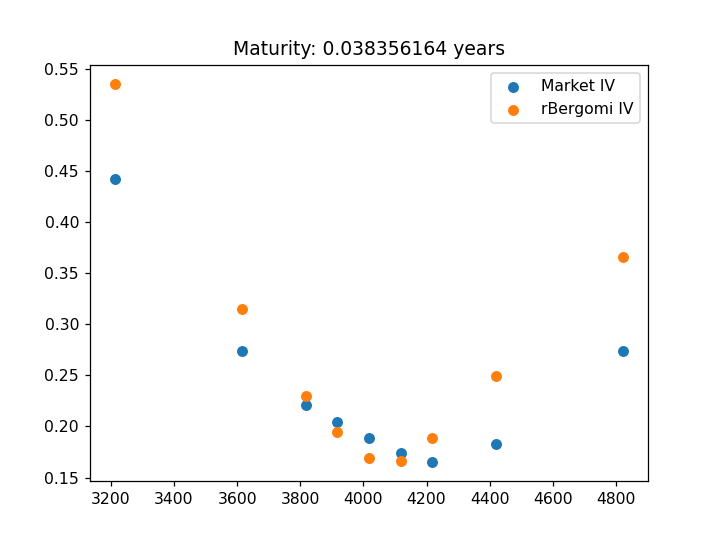

<IPython.core.display.Javascript object>


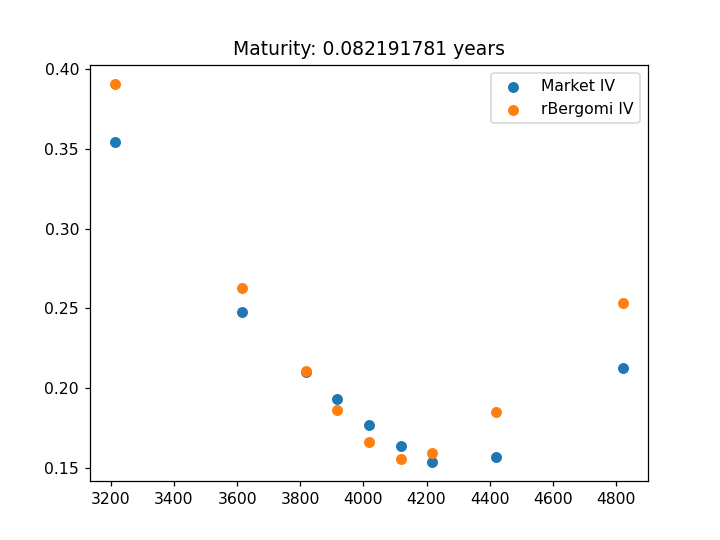

<IPython.core.display.Javascript object>


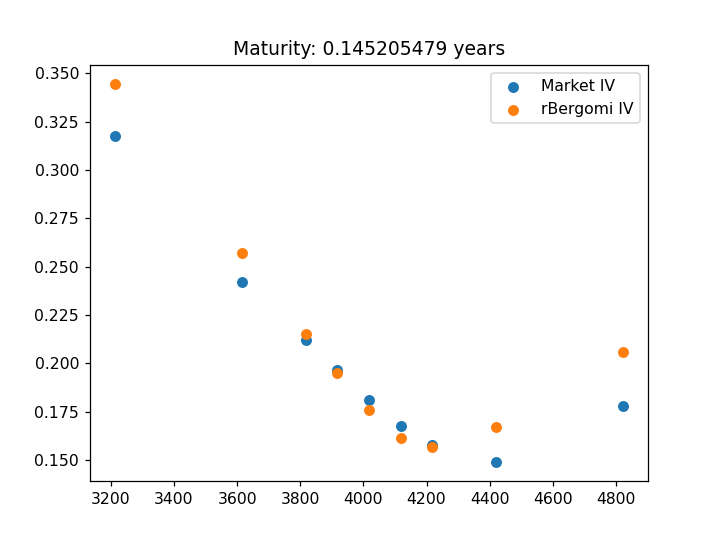

<IPython.core.display.Javascript object>


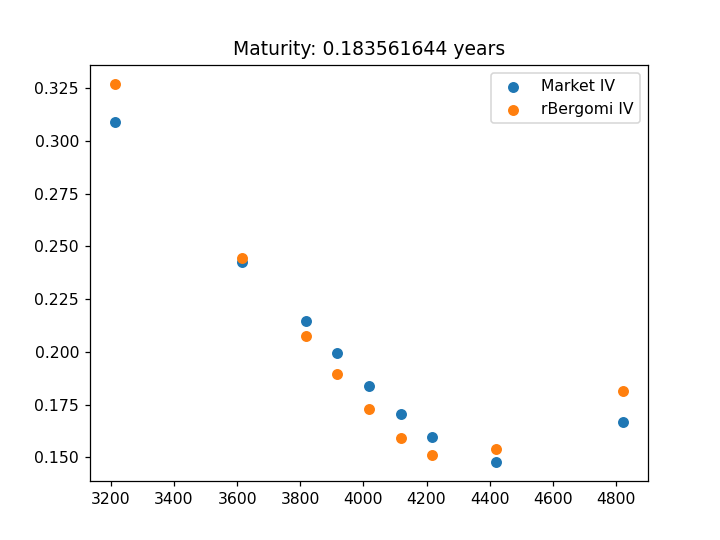

<IPython.core.display.Javascript object>


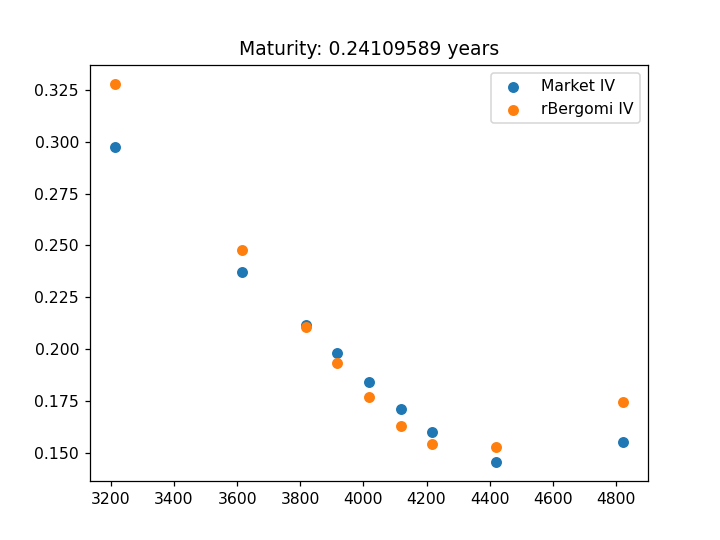

In [13]:
%matplotlib notebook

for i in range(5):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


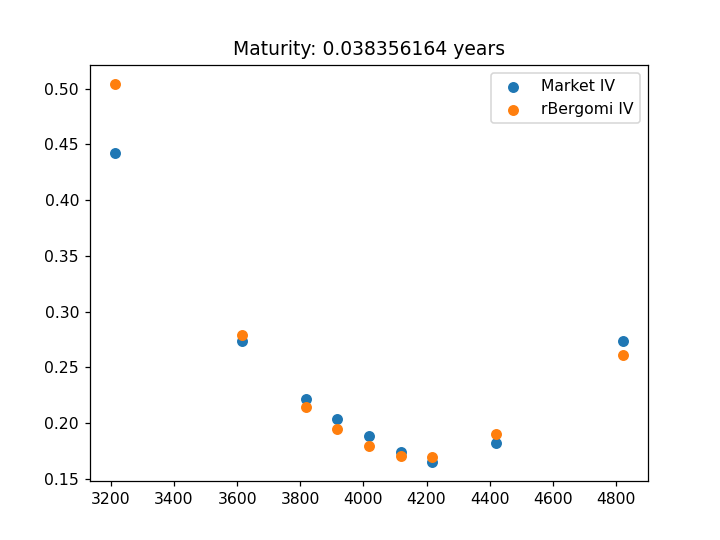

<IPython.core.display.Javascript object>


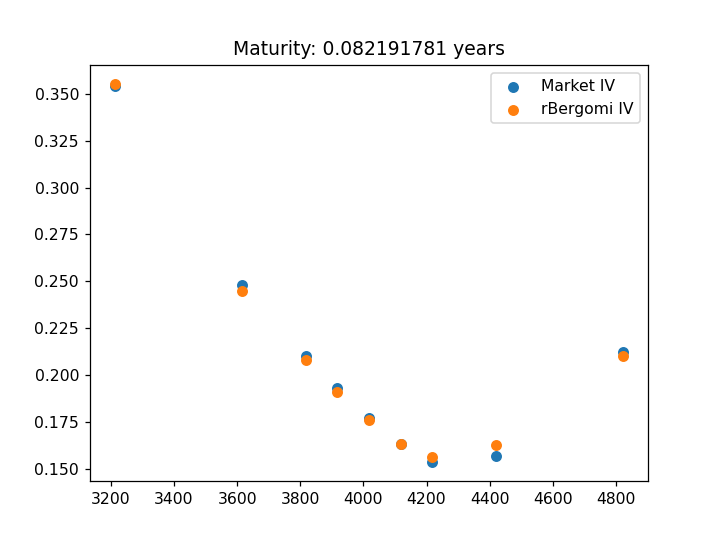

<IPython.core.display.Javascript object>


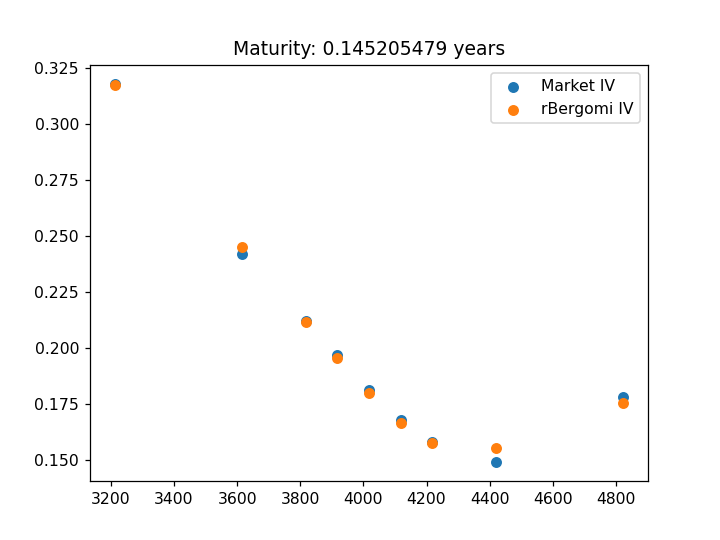

<IPython.core.display.Javascript object>


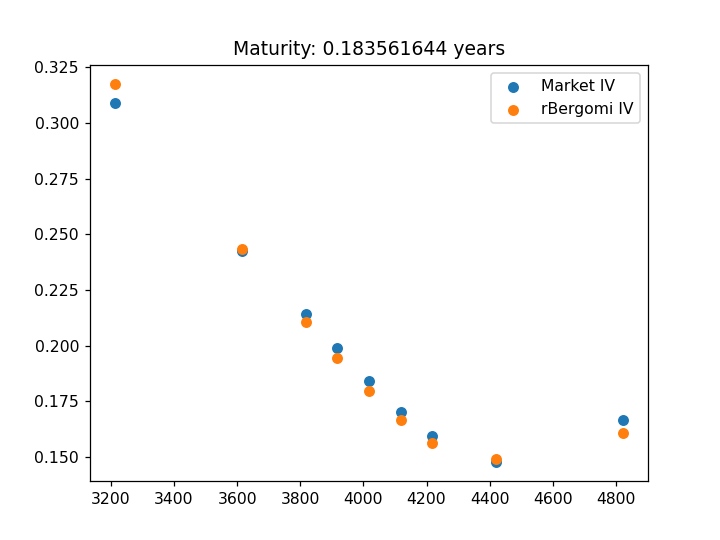

<IPython.core.display.Javascript object>


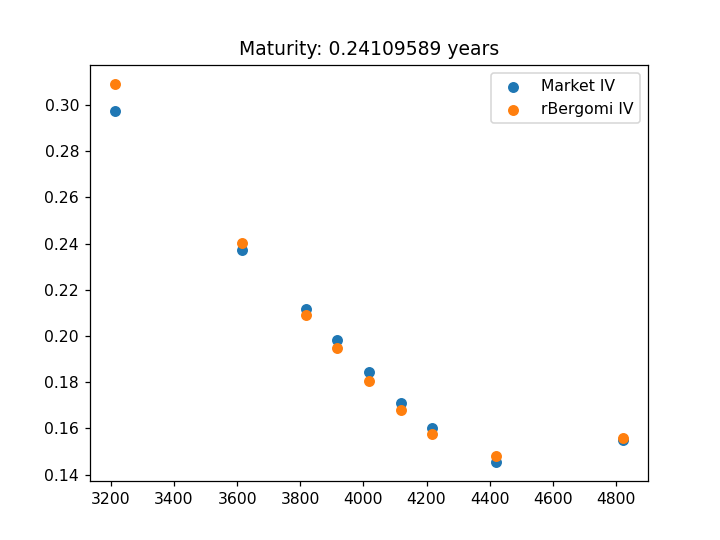

In [7]:
%matplotlib notebook

for i in range(5):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


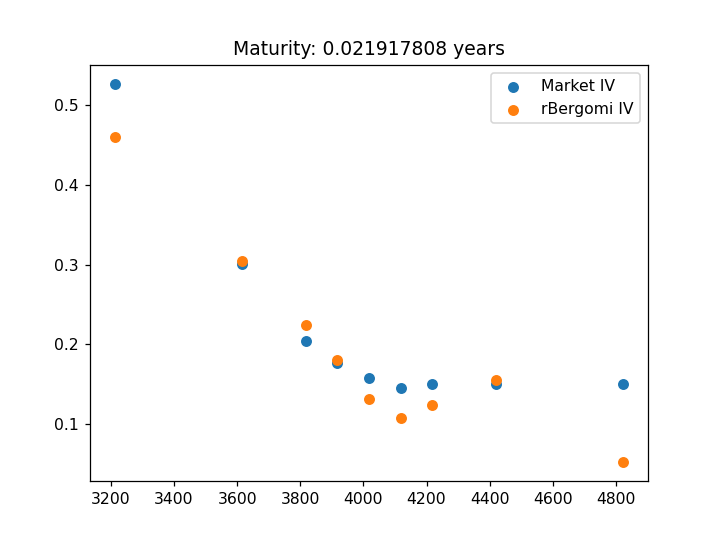

<IPython.core.display.Javascript object>


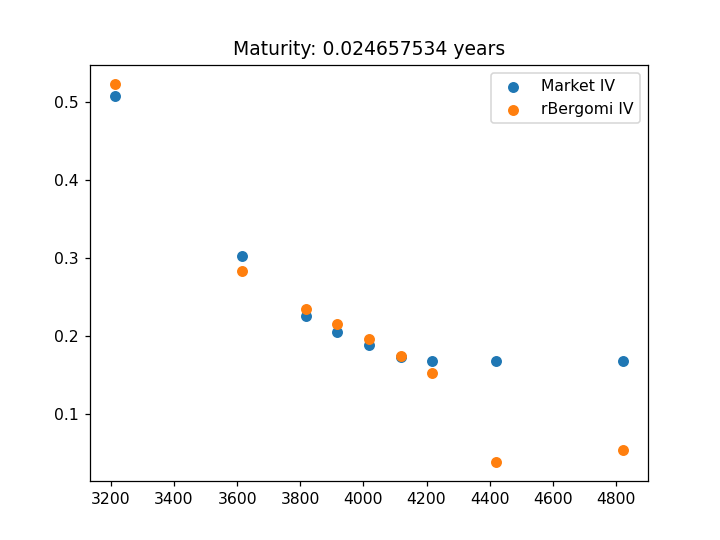

<IPython.core.display.Javascript object>


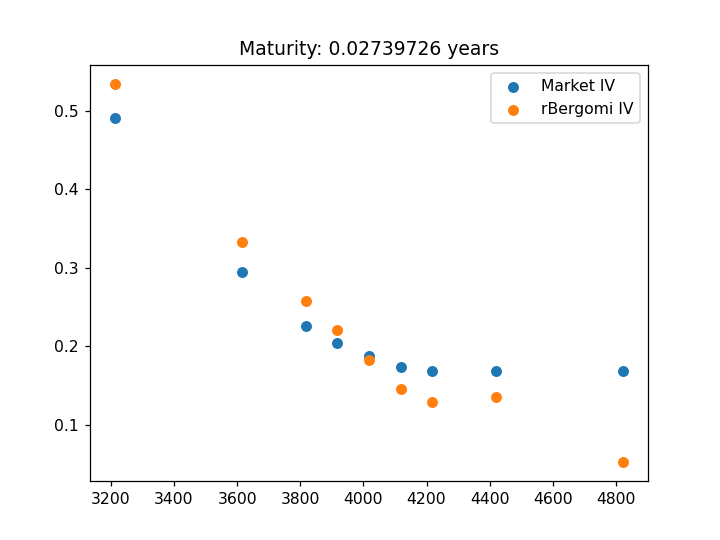

<IPython.core.display.Javascript object>


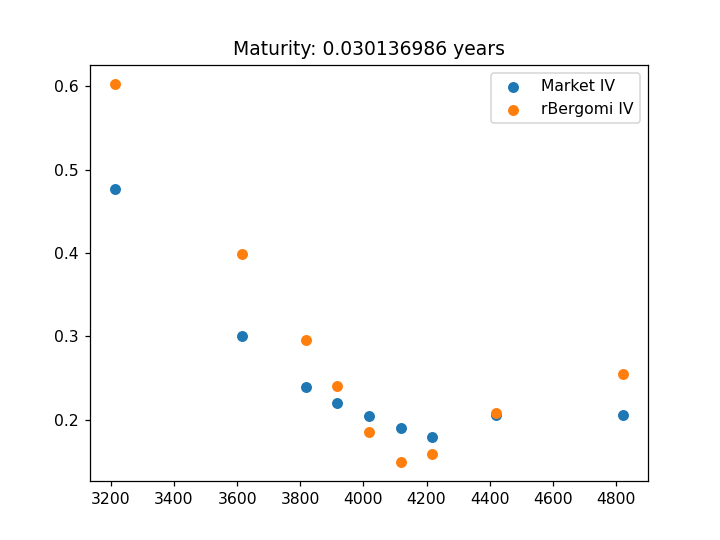

<IPython.core.display.Javascript object>


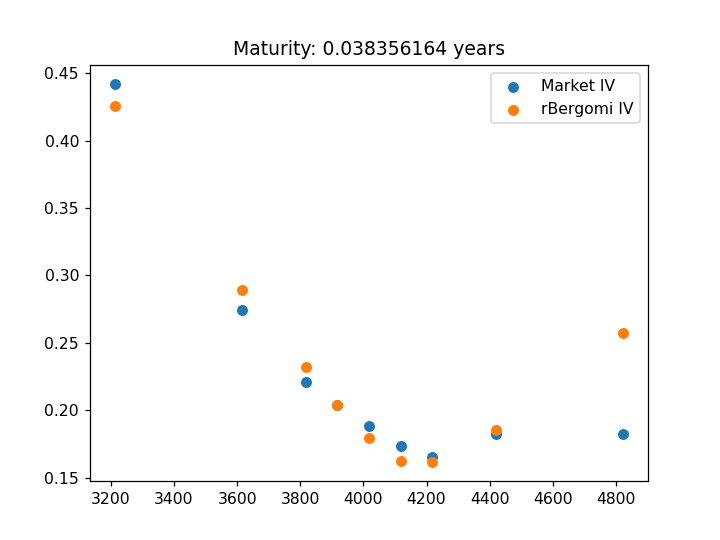

In [65]:
%matplotlib notebook

for i in range(5,10):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


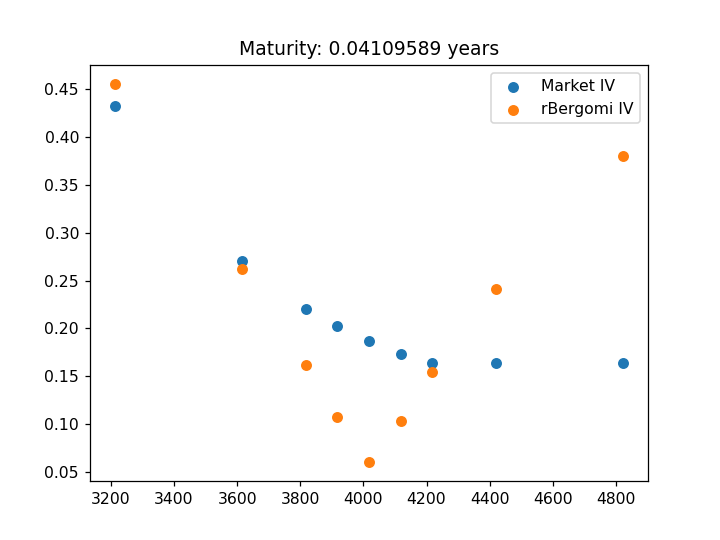

<IPython.core.display.Javascript object>


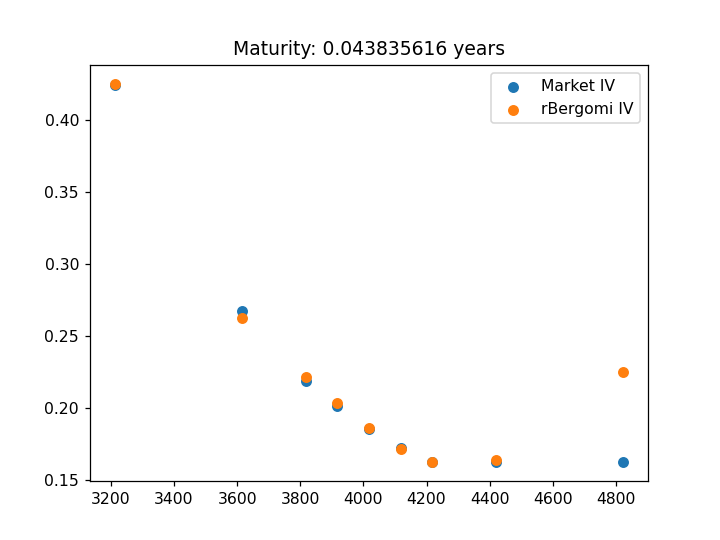

<IPython.core.display.Javascript object>


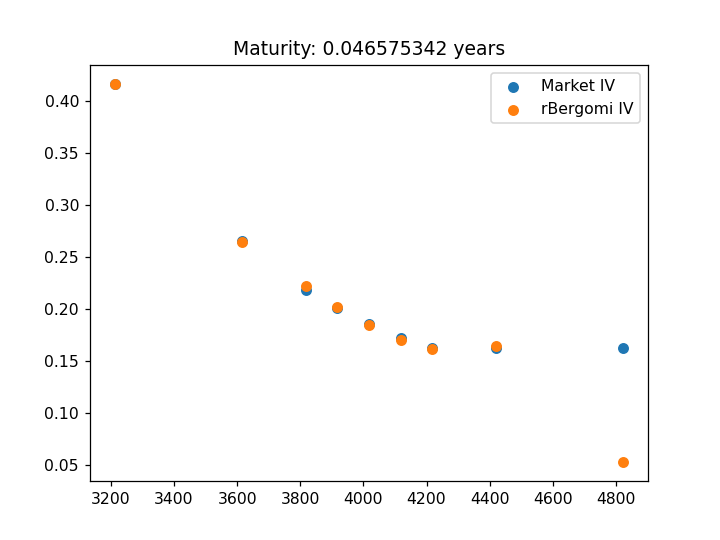

<IPython.core.display.Javascript object>


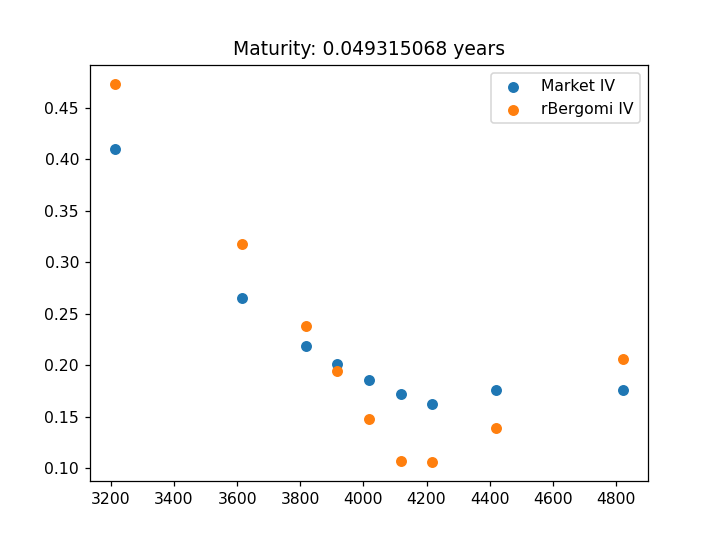

<IPython.core.display.Javascript object>


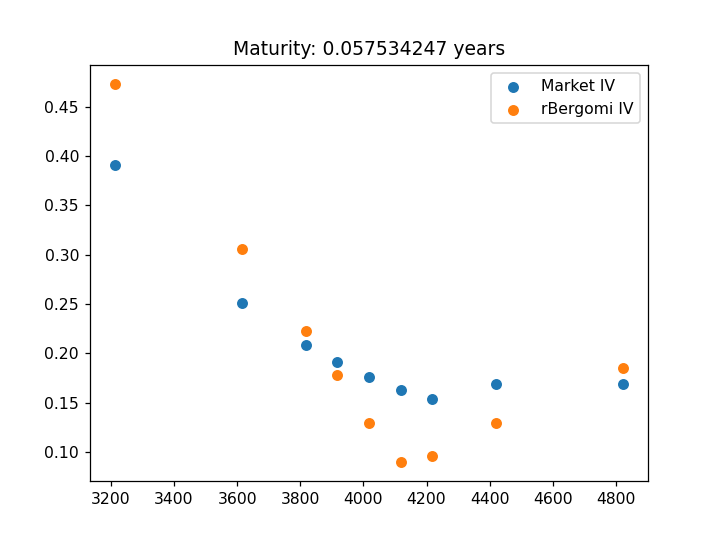

In [66]:
%matplotlib notebook

for i in range(10,15):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


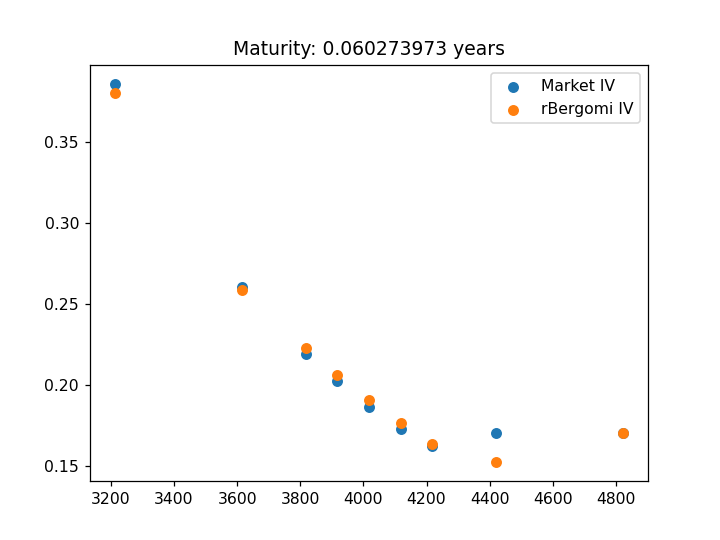

<IPython.core.display.Javascript object>


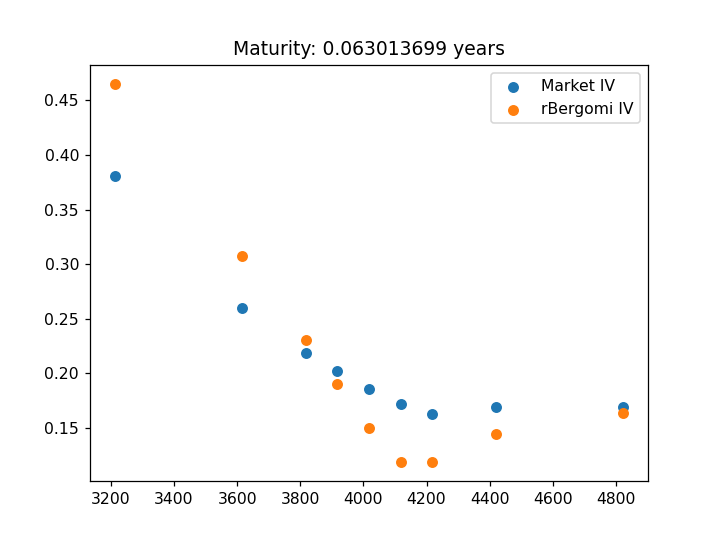

<IPython.core.display.Javascript object>


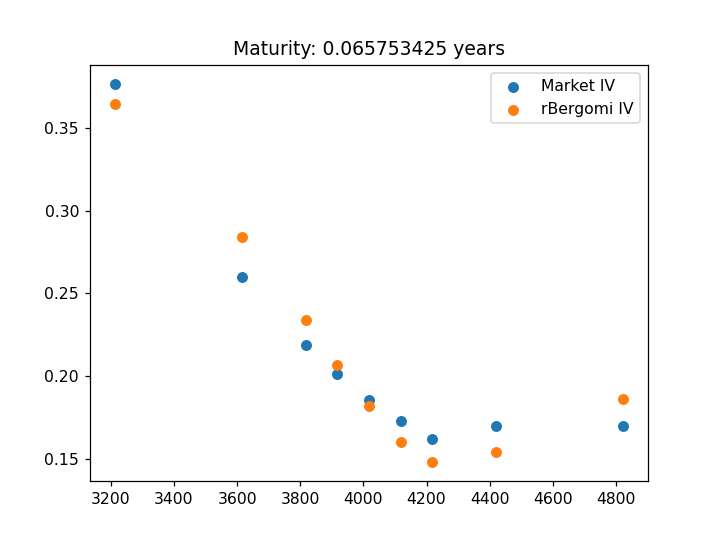

<IPython.core.display.Javascript object>


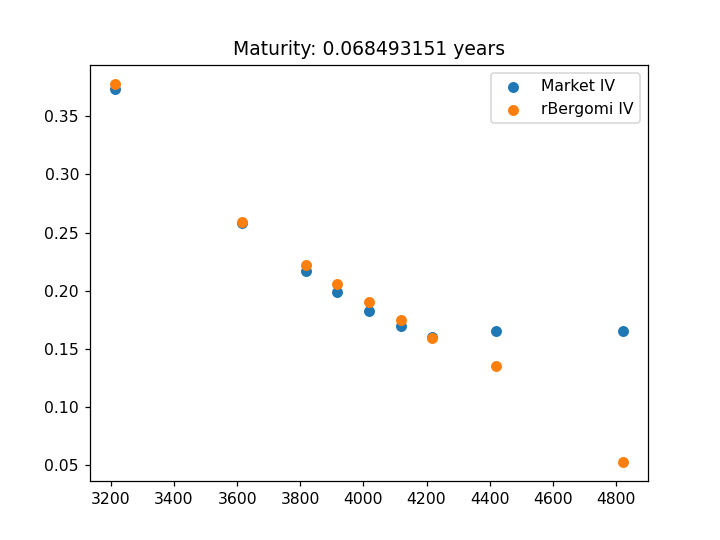

<IPython.core.display.Javascript object>


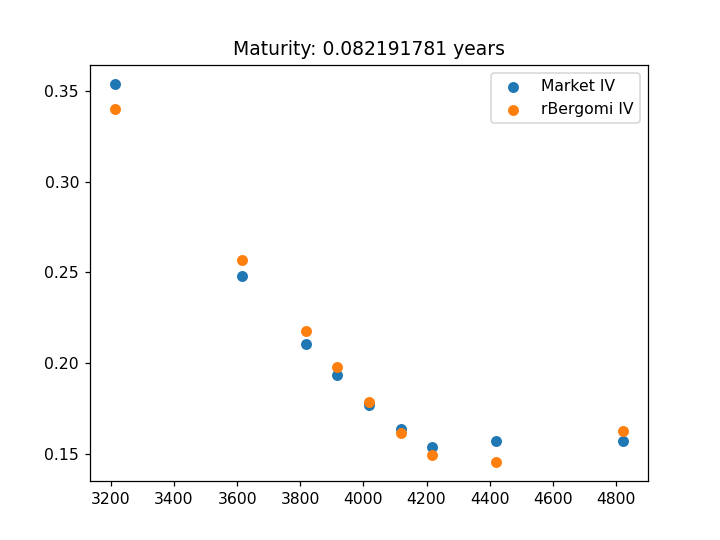

In [67]:
%matplotlib notebook

for i in range(15,20):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


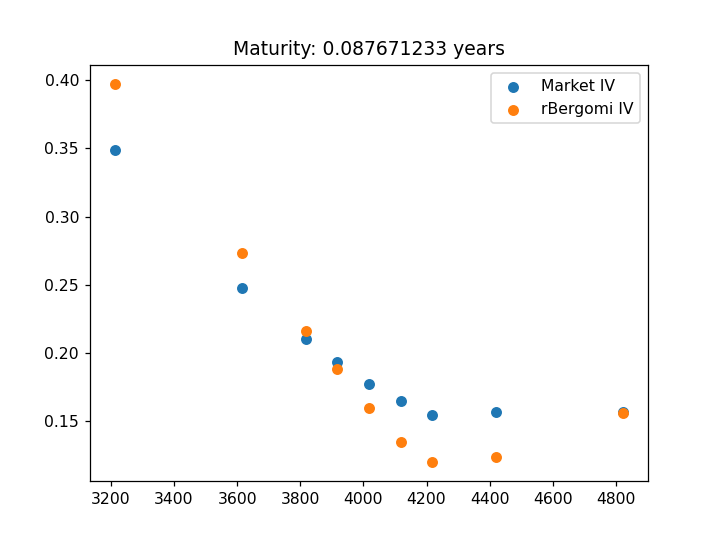

<IPython.core.display.Javascript object>


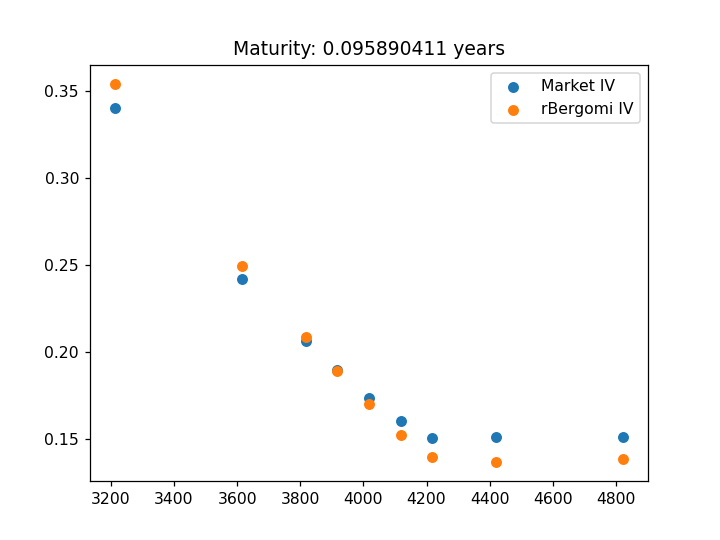

<IPython.core.display.Javascript object>


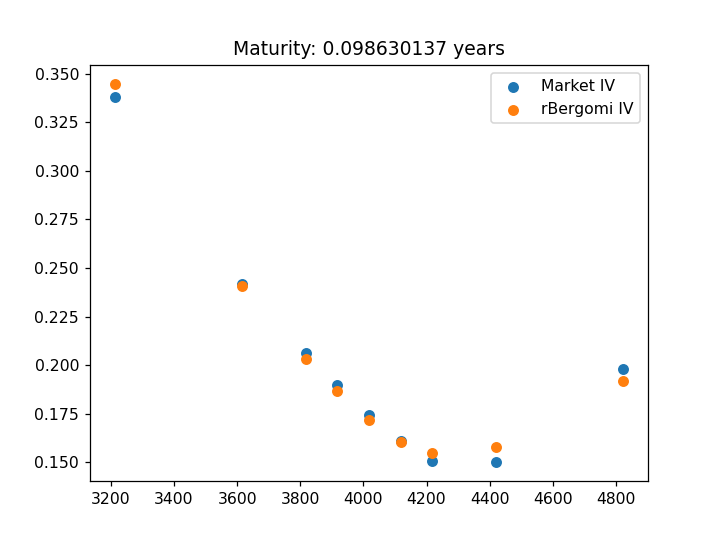

<IPython.core.display.Javascript object>


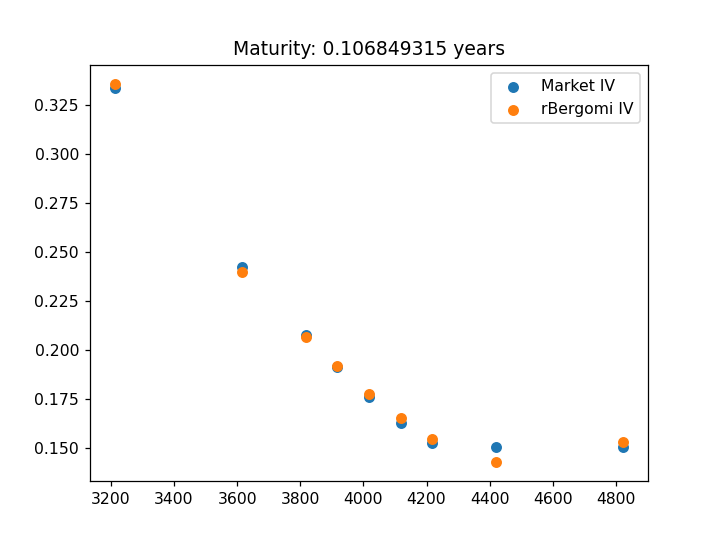

<IPython.core.display.Javascript object>


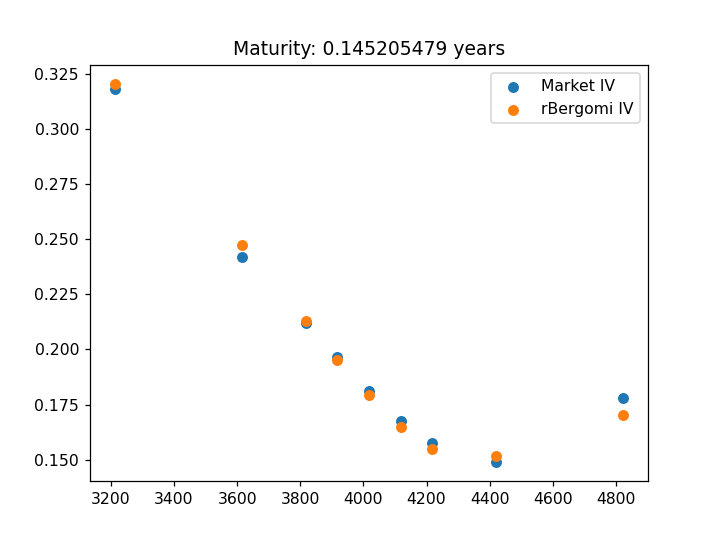

In [68]:
%matplotlib notebook

for i in range(20,25):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


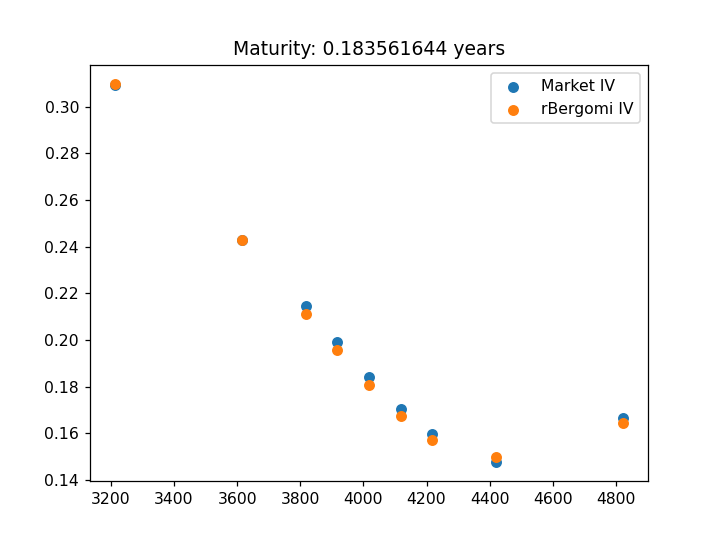

<IPython.core.display.Javascript object>


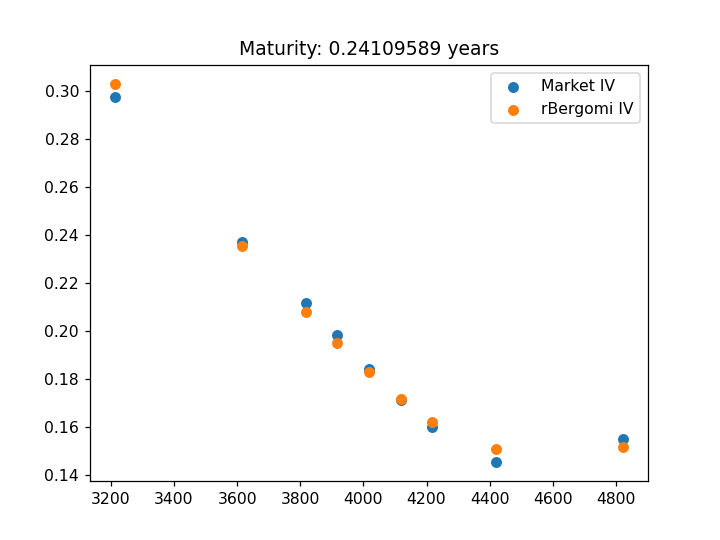

<IPython.core.display.Javascript object>


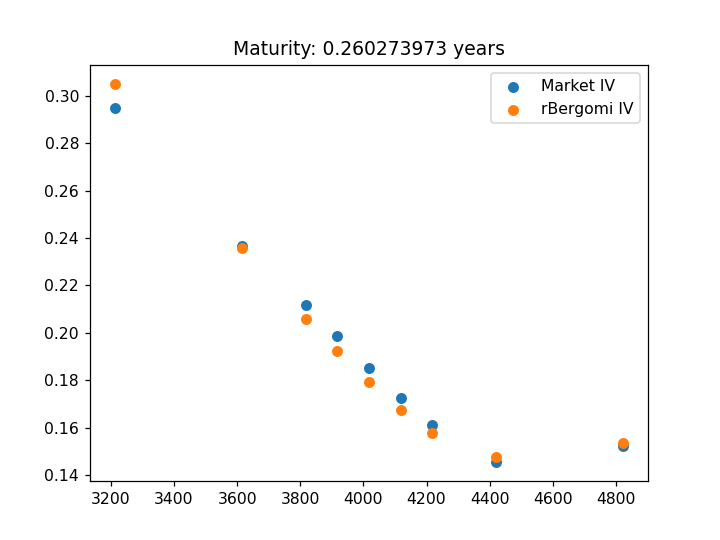

<IPython.core.display.Javascript object>


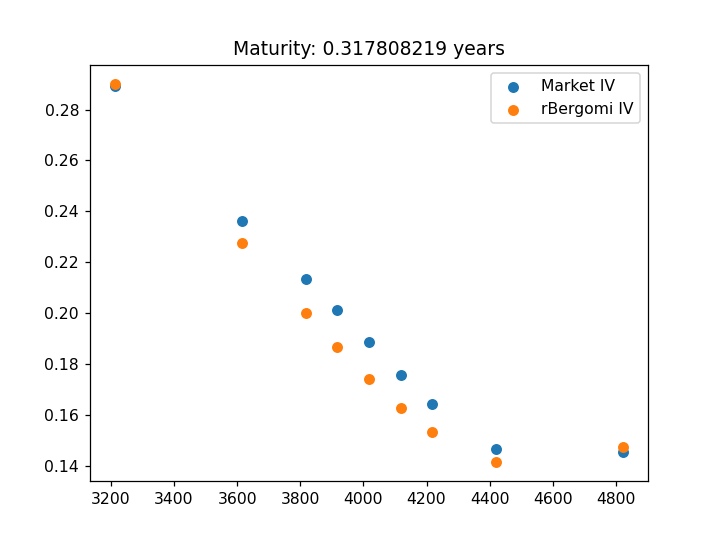

<IPython.core.display.Javascript object>


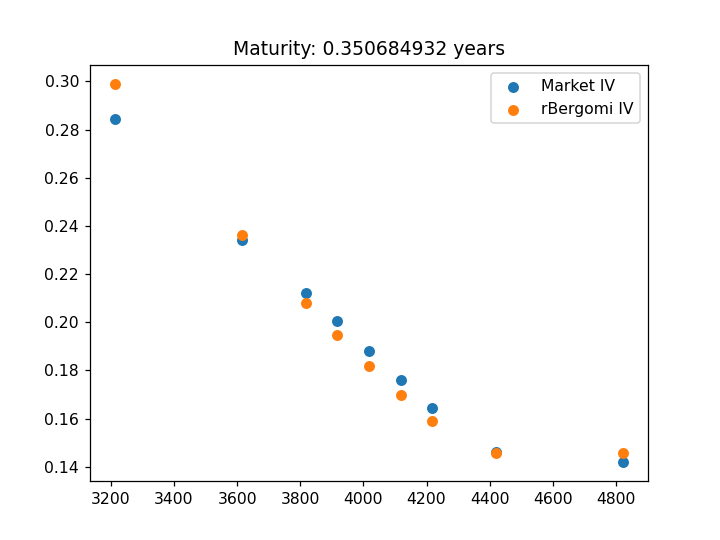

In [69]:
%matplotlib notebook

for i in range(25,30):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


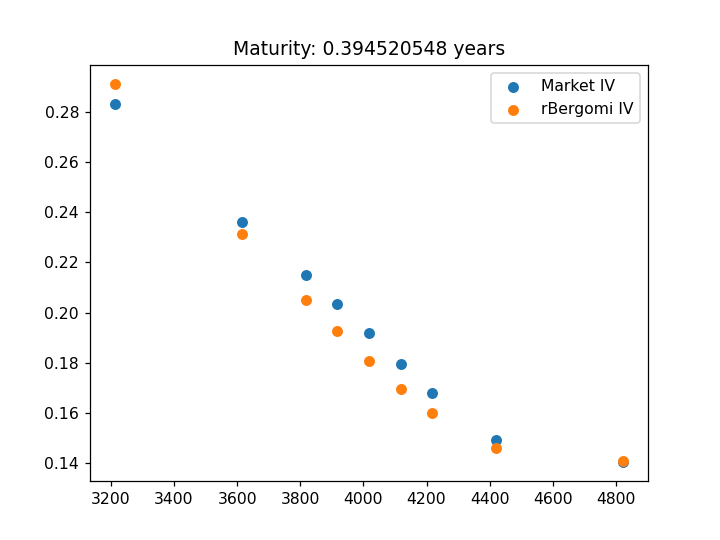

<IPython.core.display.Javascript object>


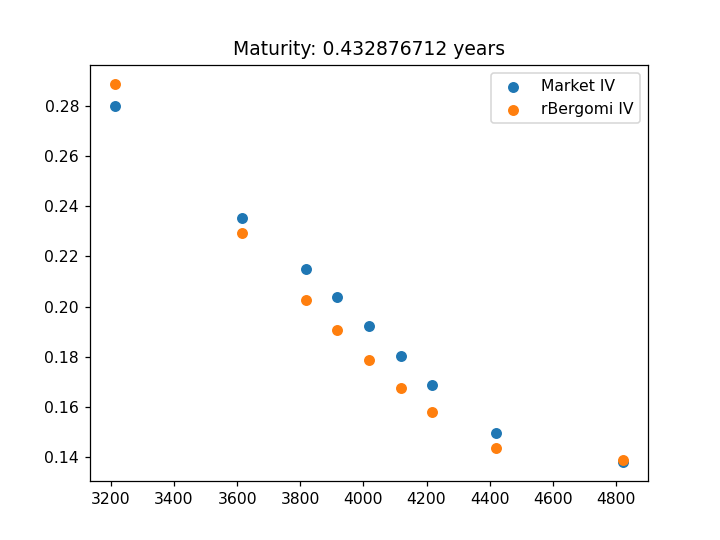

<IPython.core.display.Javascript object>


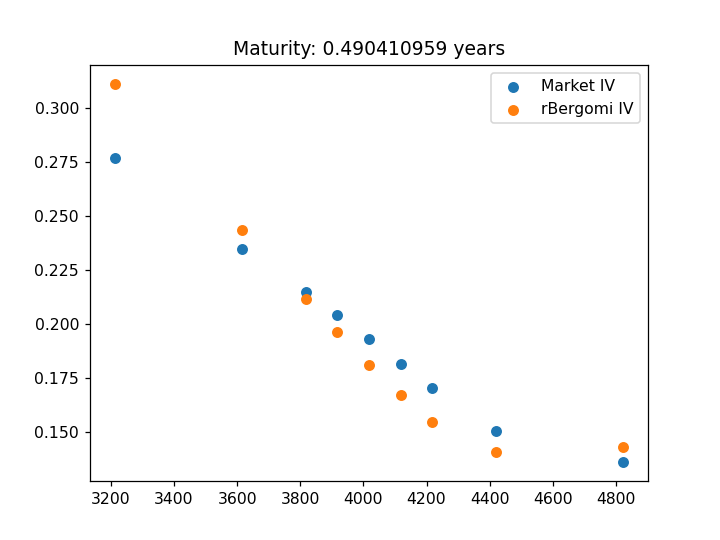

<IPython.core.display.Javascript object>


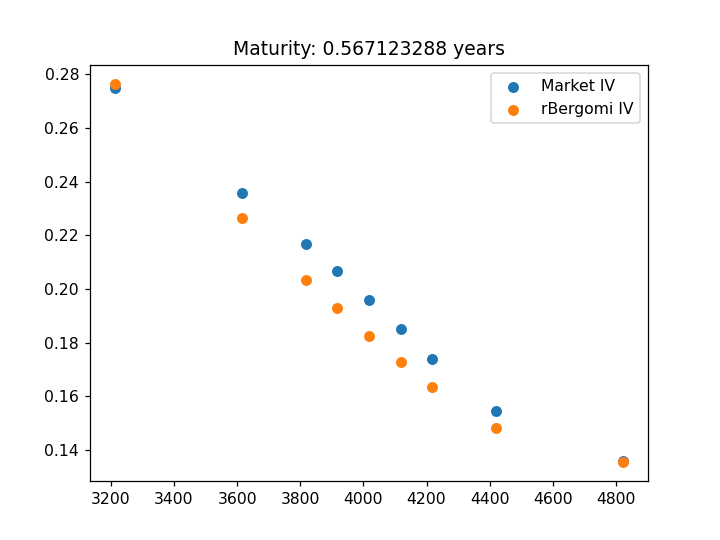

<IPython.core.display.Javascript object>


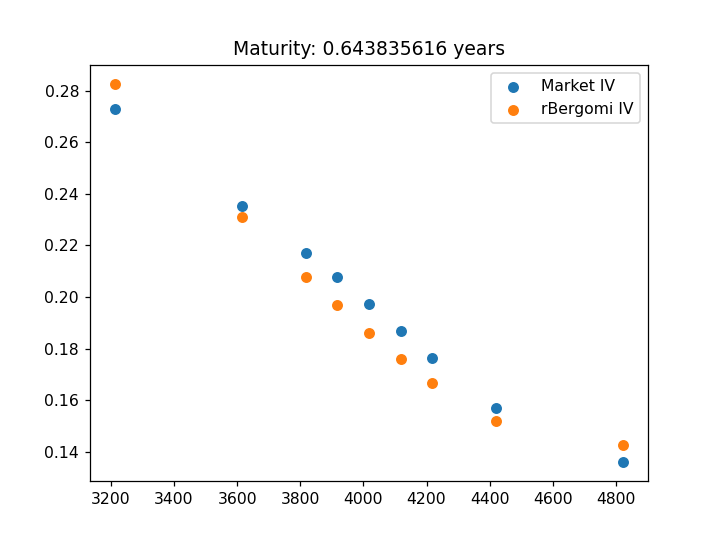

In [70]:
%matplotlib notebook

for i in range(30,35):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


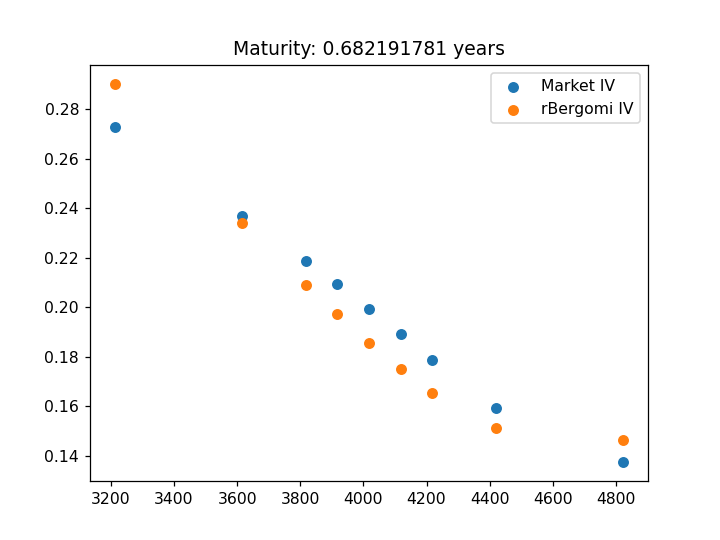

<IPython.core.display.Javascript object>


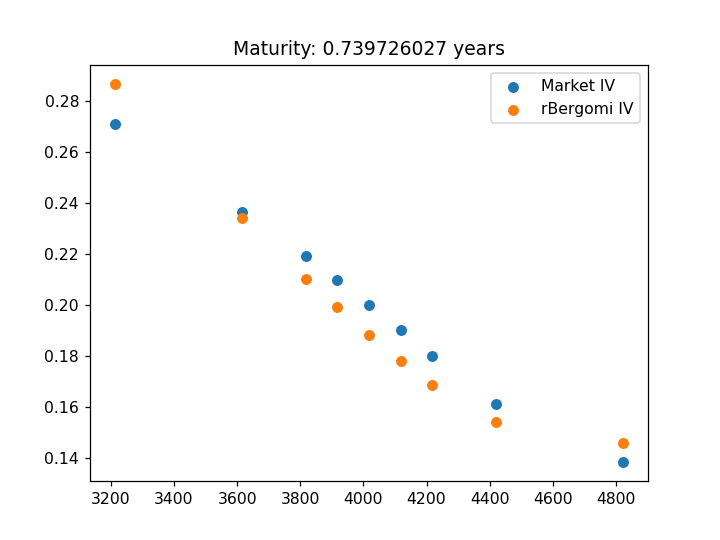

<IPython.core.display.Javascript object>


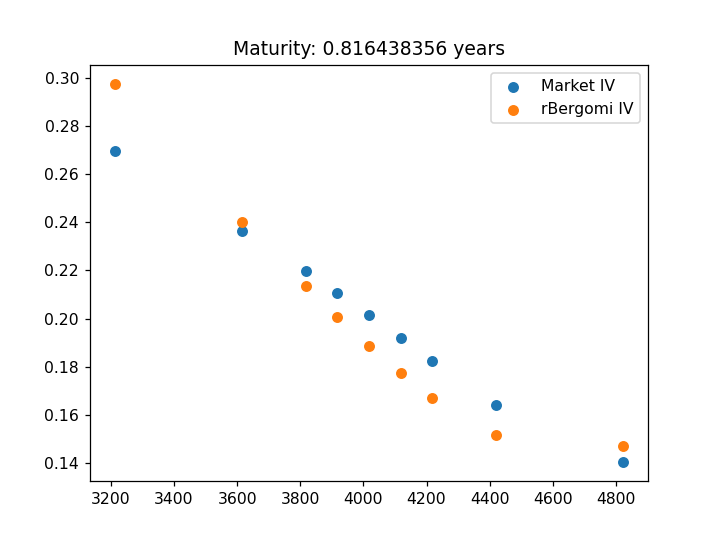

<IPython.core.display.Javascript object>


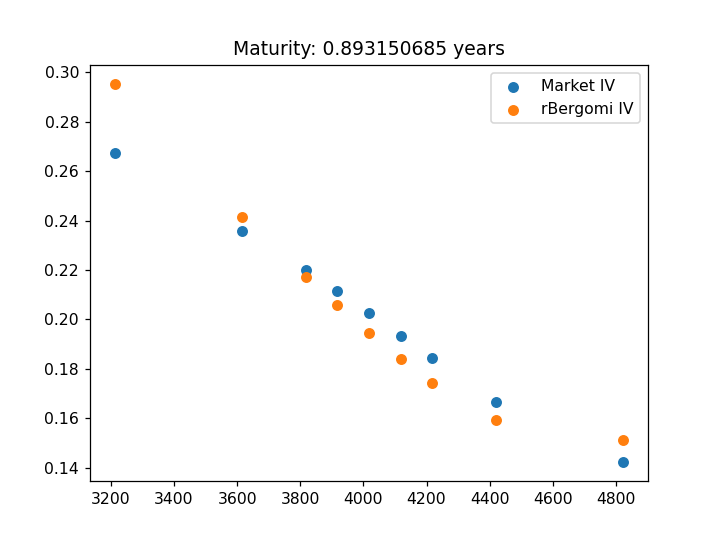

<IPython.core.display.Javascript object>


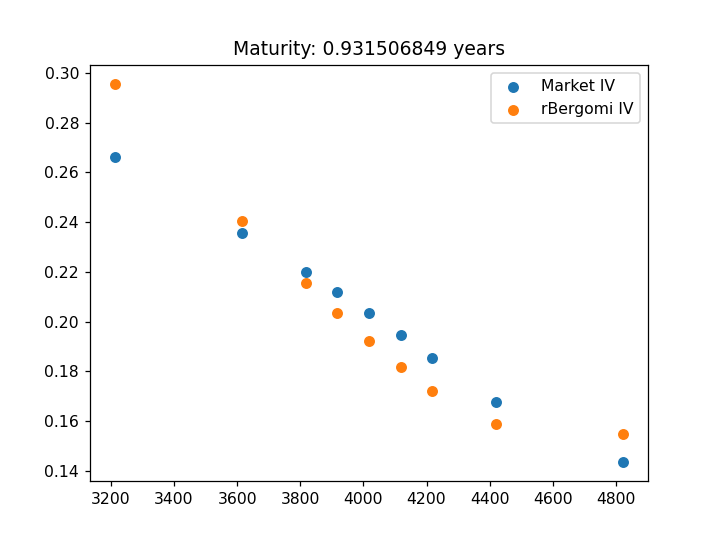

In [71]:
%matplotlib notebook

for i in range(35,40):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


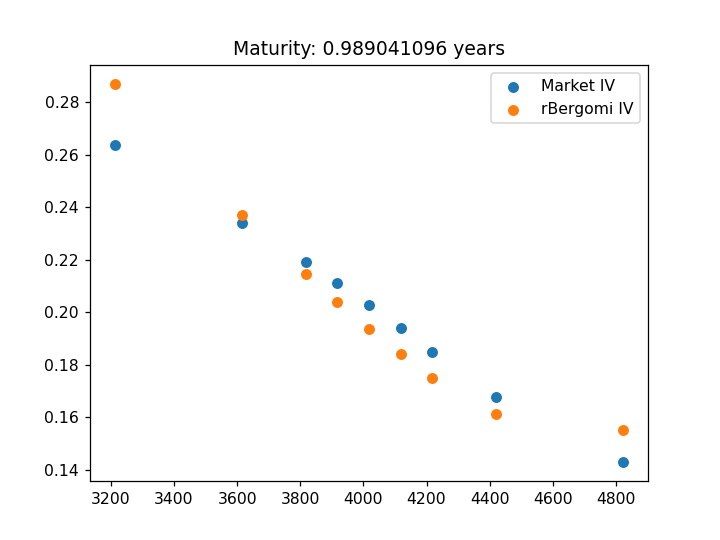

<IPython.core.display.Javascript object>


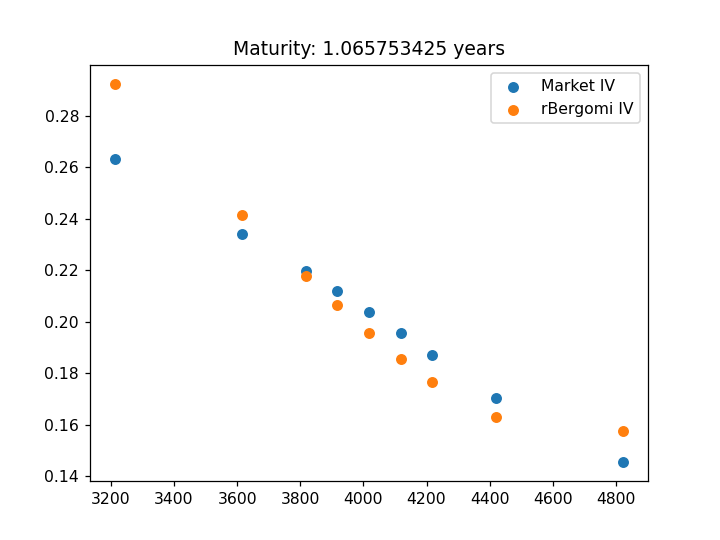

<IPython.core.display.Javascript object>


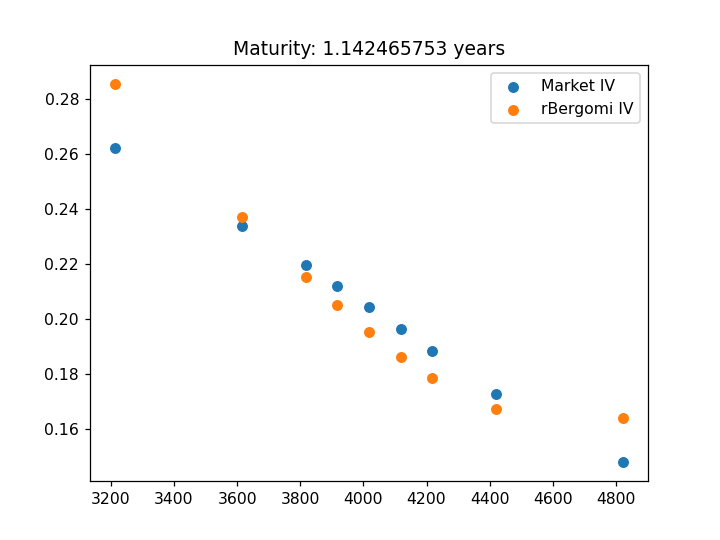

<IPython.core.display.Javascript object>


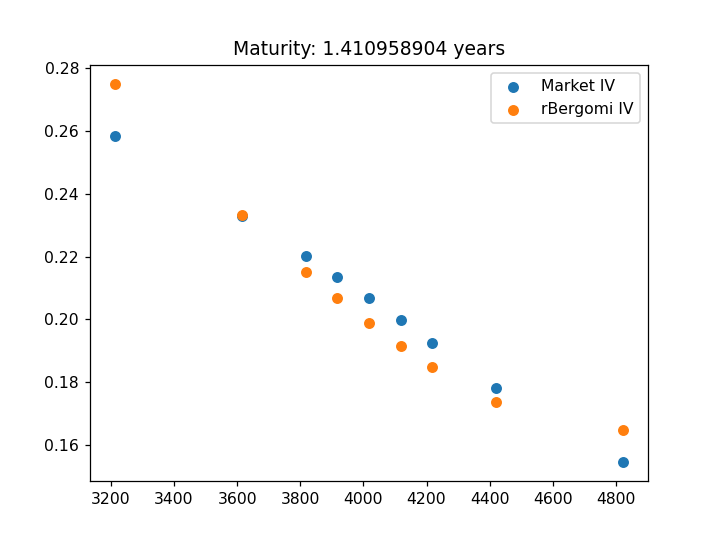

<IPython.core.display.Javascript object>


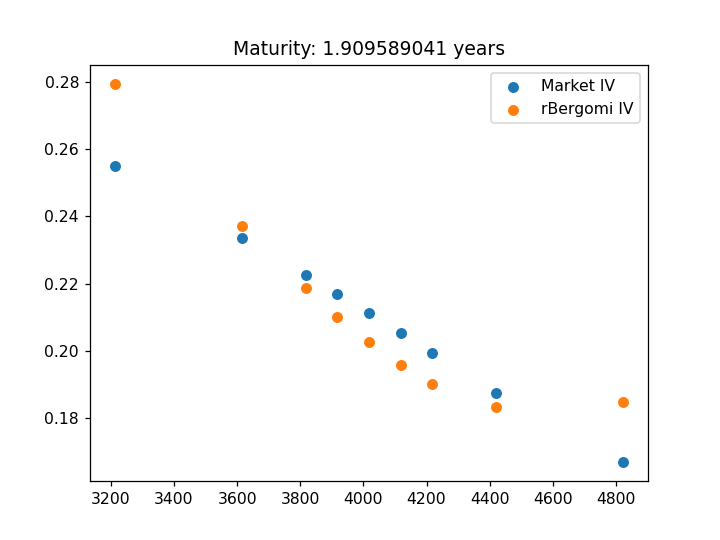

In [72]:
%matplotlib notebook

for i in range(40,45):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


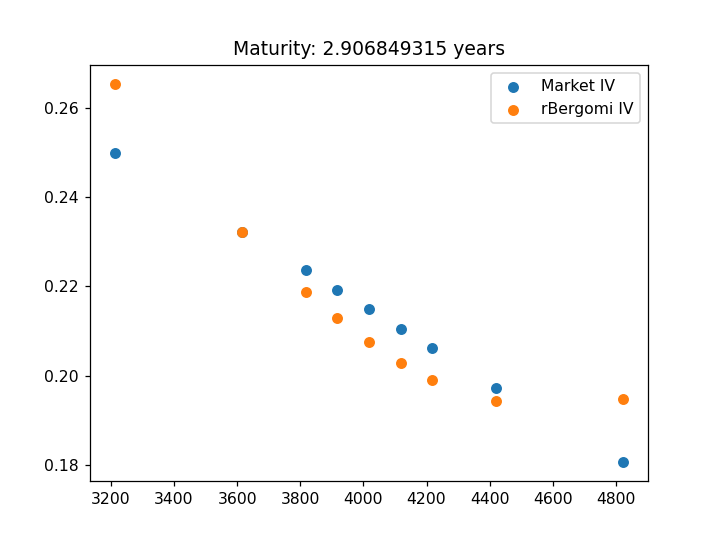

<IPython.core.display.Javascript object>


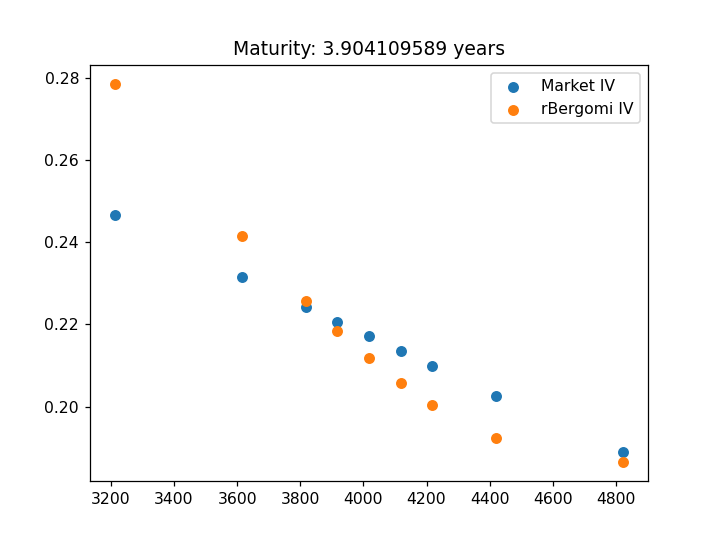

<IPython.core.display.Javascript object>


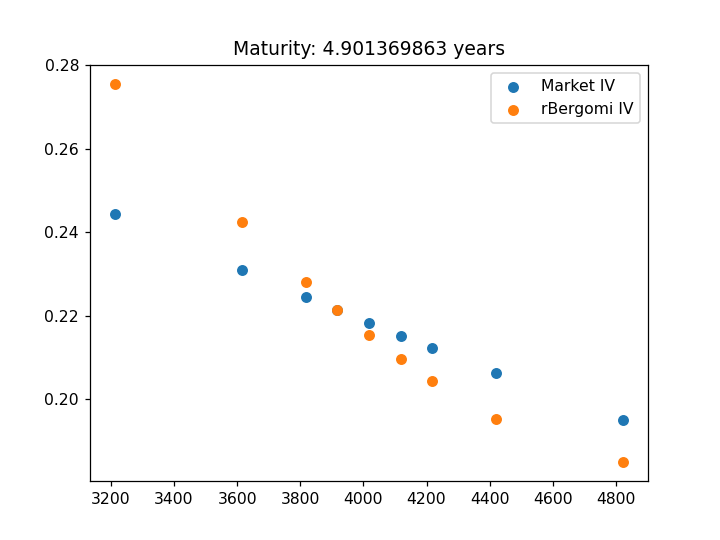

<IPython.core.display.Javascript object>


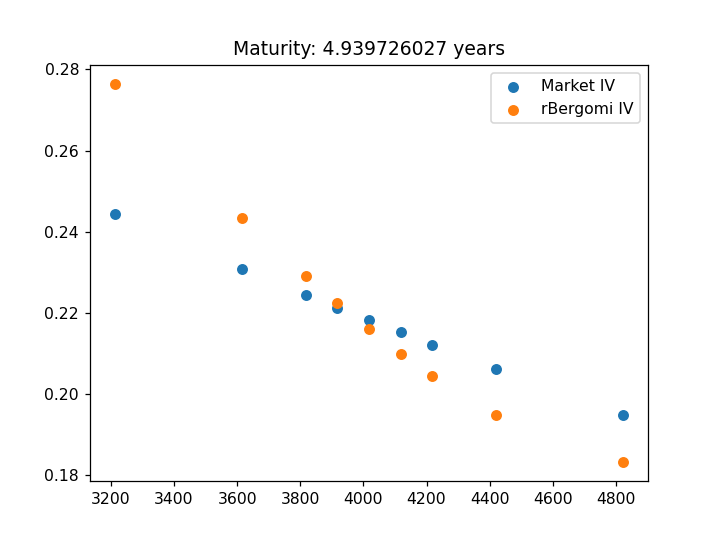

<IPython.core.display.Javascript object>


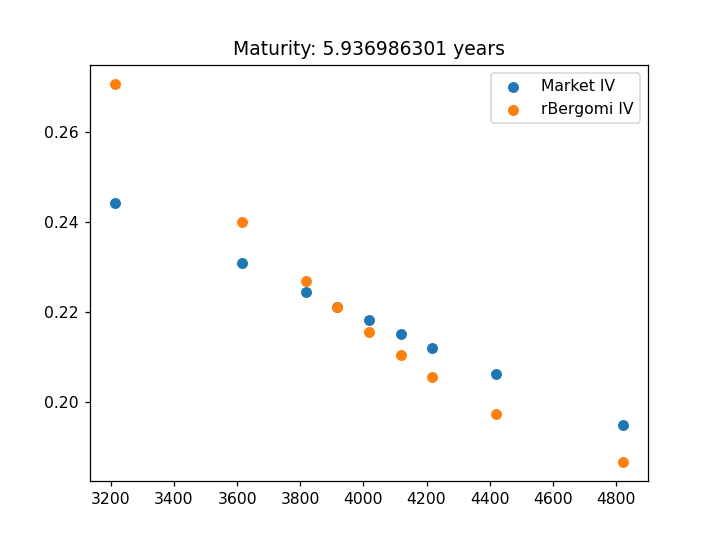

In [73]:
%matplotlib notebook

for i in range(45,50):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

<IPython.core.display.Javascript object>


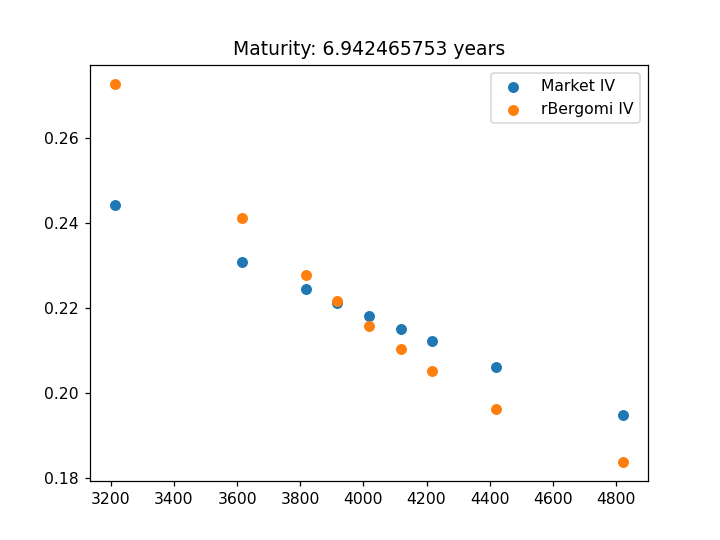

<IPython.core.display.Javascript object>


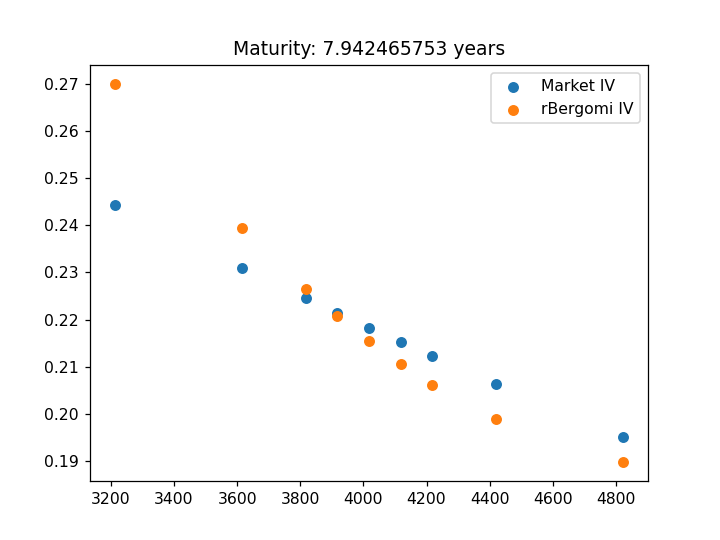

<IPython.core.display.Javascript object>


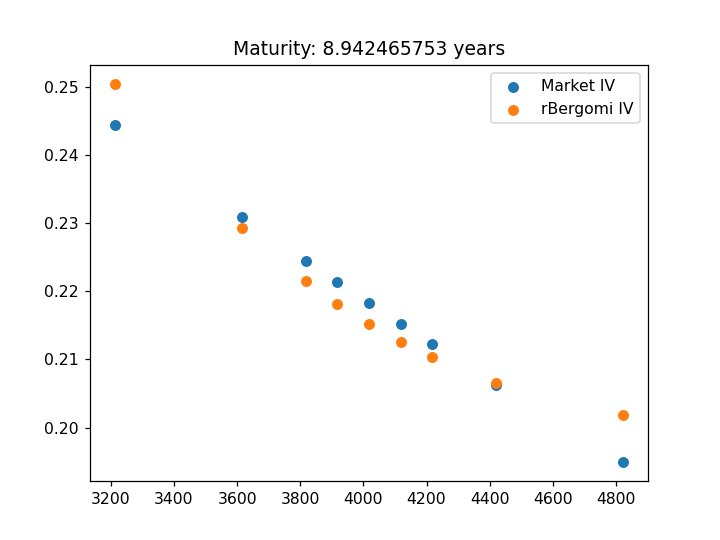

<IPython.core.display.Javascript object>


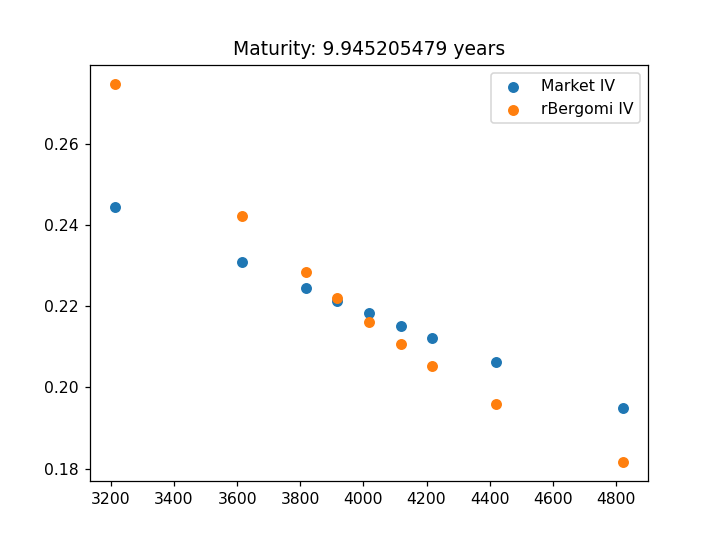

In [74]:
%matplotlib notebook

for i in range(50,54):
    plt.figure(i)
    plt.scatter(K, IV[i])
    plt.scatter(K, rB_vol[i,:])
    plt.legend(["Market IV","rBergomi IV"])
    plt.title(f'Maturity: {maturities[i]} years')

In [75]:
df = pd.DataFrame(rB_param, columns = ["H", "eta", "rho", "xi"])
df.to_csv("rB_parameters.csv", index = False)

In [76]:
db = pd.DataFrame(rB_vol)
db.to_csv("rB_iv.csv", index = False)

In [79]:
np.sum(t)/3600

2.3995193450980716